In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 

In [15]:
def date_to_str(datetime):
    return datetime.strftime("%Y-%m-%d %H:%M:%S.%f")
def splitstr(string):
    return string.split("$")
def datediff(date2, date1):
    return (date2-date1).seconds
def get_first(tup):
    wait, cycle = tup
    return wait
def get_second(tup):
    wait, cycle = tup
    return cycle

In [4]:
dateCols = ['Timestamp']
df = pd.read_csv("log.csv", parse_dates=dateCols)
df['TimeStr'] = df.apply(lambda row : date_to_str(row['Timestamp']), axis = 1)
df

,CaseID,Activity,EventType,Resource,Timestamp,TimeStr
0,409,Activity 1,assign,Role #1,2020-01-17 09:54:18.383,2020-01-17 09:54:18.383000
1,409,Activity 1,start,Role #1,2020-03-16 02:20:35.976,2020-03-16 02:20:35.976000
2,409,Activity 1,complete,Role #1,2020-03-16 02:38:22.623,2020-03-16 02:38:22.623000
3,409,Activity 2,assign,Role #1,2020-03-16 02:38:22.623,2020-03-16 02:38:22.623000
4,409,Activity 2,start,Role #1,2020-04-23 04:33:23.547,2020-04-23 04:33:23.547000
...,...,...,...,...,...,...
6598,293,Activity 5,complete,Role #2,2020-04-15 05:16:31.126,2020-04-15 05:16:31.126000
6599,293,Activity 4,complete,Role #2,2020-04-15 05:25:01.348,2020-04-15 05:25:01.348000
6600,293,Activity 8,assign,Role #4,2020-04-15 05:25:01.348,2020-04-15 05:25:01.348000
6601,293,Activity 8,start,Role #4,2020-05-06 05:35:01.766,2020-05-06 05:35:01.766000


In [5]:
concat_time = df.groupby(['CaseID','Activity'])['Timestamp'].apply(lambda x: ((x.iloc[1]-x.iloc[0]).seconds, (x.iloc[2]-x.iloc[1]).seconds)).reset_index()
concat_time

,CaseID,Activity,Timestamp
0,49,Activity 1,"(86219, 956)"
1,49,Activity 2,"(84289, 651)"
2,49,Activity 6,"(0, 85549)"
3,49,Activity 7,"(1344, 1280)"
4,49,Activity 8,"(8539, 3557)"
...,...,...,...
2196,448,Activity 2,"(4973, 655)"
2197,448,Activity 3,"(735, 893)"
2198,448,Activity 4,"(2102, 1715)"
2199,448,Activity 5,"(2536, 384)"


In [18]:
concat_time['WaitingTime'] = concat_time.apply(lambda row : get_first(row['Timestamp']), axis = 1)
concat_time['CycleTime'] = concat_time.apply(lambda row : get_second(row['Timestamp']), axis = 1)
concat_time

,CaseID,Activity,Timestamp,WaitingTime,CycleTime
0,49,Activity 1,"(86219, 956)",86219,956
1,49,Activity 2,"(84289, 651)",84289,651
2,49,Activity 6,"(0, 85549)",0,85549
3,49,Activity 7,"(1344, 1280)",1344,1280
4,49,Activity 8,"(8539, 3557)",8539,3557
...,...,...,...,...,...
2196,448,Activity 2,"(4973, 655)",4973,655
2197,448,Activity 3,"(735, 893)",735,893
2198,448,Activity 4,"(2102, 1715)",2102,1715
2199,448,Activity 5,"(2536, 384)",2536,384


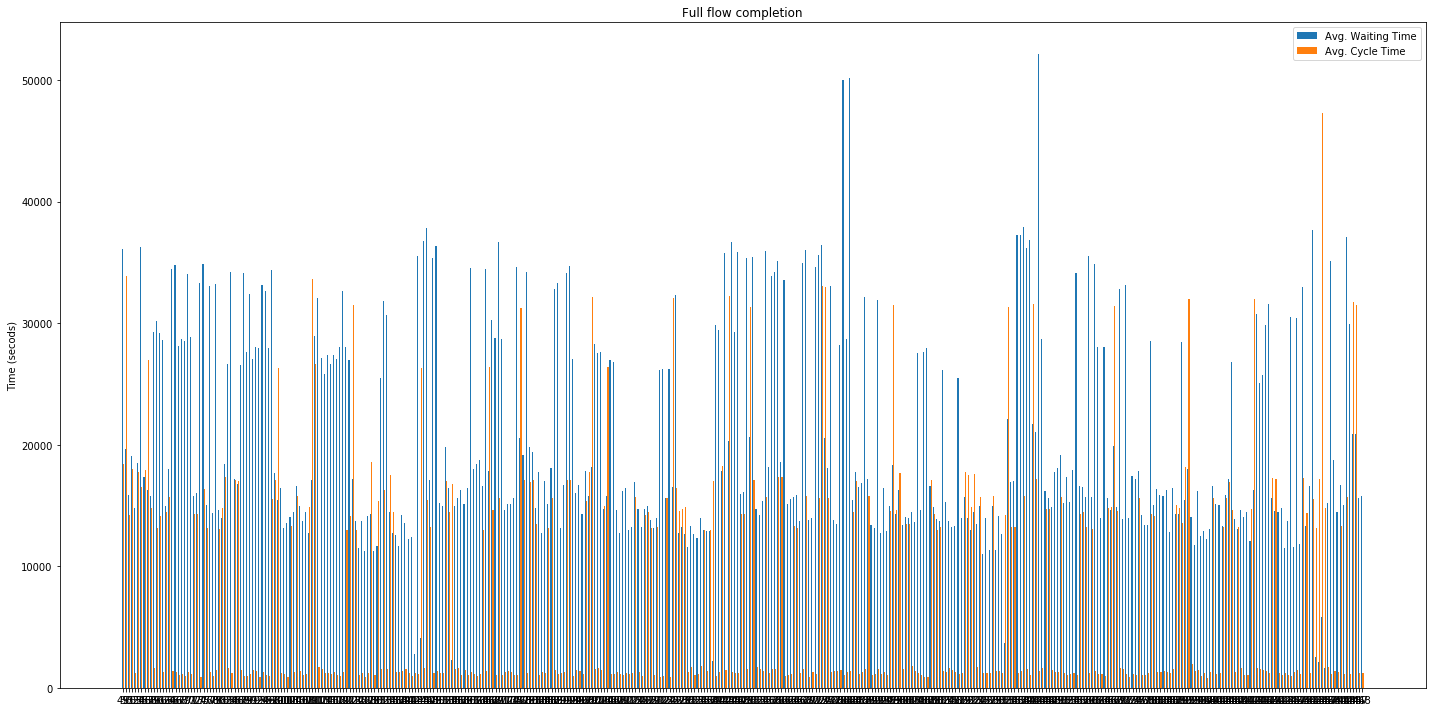

In [44]:
concat_time.drop(labels='Timestamp', axis=1)
waiting_time_mean = concat_time.groupby('CaseID').mean()['WaitingTime'].to_list()
cycle_time_mean = concat_time.groupby('CaseID').mean()['CycleTime'].to_list()
case_id = list(range(49,449))
x = np.arange(len(case_id))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, waiting_time_mean, width, label='Avg. Waiting Time')
rects2 = ax.bar(x + width/2, cycle_time_mean, width, label='Avg. Cycle Time')
ax.set_ylabel('Time (secods)')
ax.set_title('Full flow completion')
ax.set_xticks(x)
ax.set_xticklabels(case_id)
ax.legend()
fig.tight_layout()
plt.show()